# Bike Sharing Demand Case Study
---
*By Harsh R*

## Table of Contents
* [Introduction](#Introduction)
* [Problem Statement](#Problem-Statement)
* [Business Objective](#Business-Objective)
* [Data Understanding](#Data-Understanding)
* [Data Preprocessing](#Data-Preprocessing)
* [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
* [Feature Engineering](#Feature-Engineering)
    * [Encoding Categorical Variables](#Encoding-Categorical-Variables)
    * [Scaling Numerical Features](#Scaling-Numerical-Features)
* [Model Building](#Model-Development)
    * [Feature Selection](#Feature-Selection)
* [Model Evaluation](#Model-Evaluation)
    * [Making Predictions](#Making-Predictions)
* [Result](#Result)

## Introduction
**[Back to Top](#Table-of-Contents)**

A bike-sharing system is a popular service that provides bikes for shared use on a short-term basis. Users can borrow bikes from designated docks, typically controlled by a computer system, and return them to any dock within the same network. These systems have gained traction as a convenient and eco-friendly transportation option.

## Problem Statement
**[Back to Top](#Table-of-Contents)**

BoomBikes, a leading bike-sharing provider in the US, has experienced significant revenue declines during the ongoing COVID-19 pandemic. In order to sustain and accelerate their revenue once the lockdown measures are lifted and the economy rebounds, BoomBikes aims to develop a comprehensive understanding of the future demand for shared bikes. This understanding will enable them to effectively cater to customers' needs, differentiate themselves from competitors, and generate substantial profits.

To achieve this, BoomBikes has engaged a consulting company to identify the key factors that influence the demand for shared bikes in the American market. They seek answers to two critical questions: which variables are significant in predicting bike demand, and how well these variables describe the fluctuations in demand. To gather insights, BoomBikes has collected a large dataset on daily bike demands across the American market, incorporating factors such as meteorological surveys and people's preferences.

By addressing these questions and analyzing the dataset, BoomBikes aims to enhance their strategic decision-making, optimize their operations, and position themselves as a market leader in the post-quarantine period.

## Business Objective
**[Back to Top](#Table-of-Contents)**

The objective is to develop a demand model for shared bikes, utilizing the available independent variables. This model will enable the management to gain insights into the variations in demand based on different features. By understanding these demand patterns, the management can strategically adjust the business strategy to align with demand levels and exceed customer expectations. Additionally, the model will provide valuable insights into the demand dynamics of new markets, allowing the management to make informed decisions and effectively penetrate these markets. Ultimately, this objective aims to optimize operations, enhance customer satisfaction, and drive business growth.

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Data Understanding
**[Back to Top](#Table-of-Contents)**

In [2]:
import numpy as np
import pandas as pd

In [3]:
bikes_df = pd.read_csv("data/day.csv")

In [4]:
with open('data/Data Dictionary.txt') as file:
    print(file.read())

Dataset characteristics
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
License

In [5]:
bikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Preprocessing
**[Back to Top](#Table-of-Contents)**

In [6]:
# Convert dteday column to datetime object so that day can be extracted
bikes_df['day'] = pd.to_datetime(bikes_df.dteday).dt.day

In [7]:
# Drop unnecessary columns
dropped_cols = ['casual', 'registered', 'instant', 'dteday']
bikes_df.drop(columns=dropped_cols, inplace=True)

#### Replacing values in categorical columns with more interpretable values rather than numerical values.

In [8]:
# Map Numerical season values into interpretable strings
bikes_df['season'] = bikes_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [9]:
# Map Month Columns into Interpretable String based on Month Names
month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
bikes_df['mnth'] = bikes_df['mnth'].map(month_mapping)

In [10]:
# Map Weekday Feature into Interpretable String
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
bikes_df['weekday'] = bikes_df['weekday'].map(weekday_mapping)

In [11]:
# Map Weathersit Feature into Interpretable String
weather_mapping = {1: 'clear', 2: 'misty', 3: 'light_rain_snow', 4: 'heavy_rain_snow'}
bikes_df['weathersit'] = bikes_df['weathersit'].map(weather_mapping)

In [12]:
# Checking for any null values:
bikes_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
day           0
dtype: int64

## Exploratory Data Analysis (EDA)
**[Back to Top](#Table-of-Contents)**

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

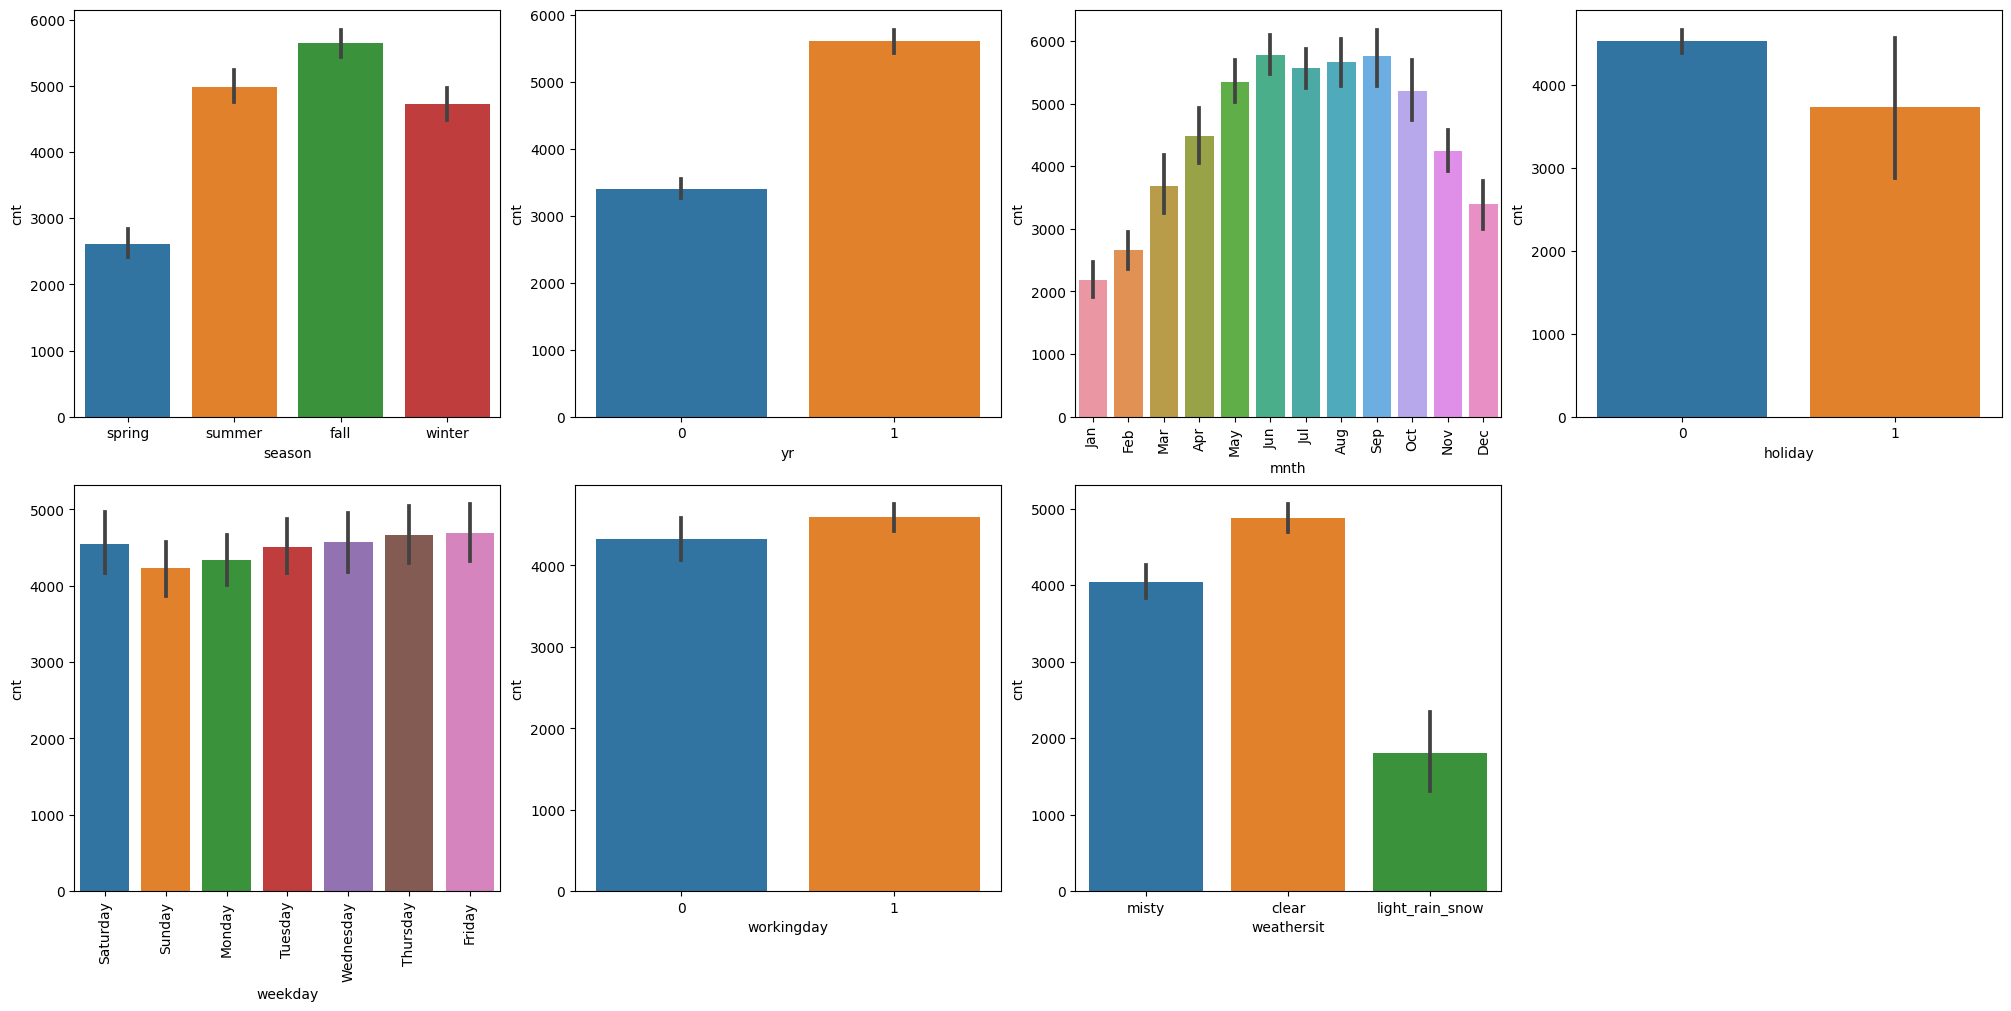

In [14]:
plt.figure(figsize=(20, 10), layout='constrained')
plot_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for idx, col in enumerate(plot_cols):
    if idx in [plot_cols.index("weekday")+1, plot_cols.index("mnth")+1]:
        plt.xticks(rotation=90)
    else:
        plt.xticks(rotation=0)
    plt.subplot(2, 4, idx+1)
    sns.barplot(data=bikes_df, x=col, y='cnt', estimator=np.mean)

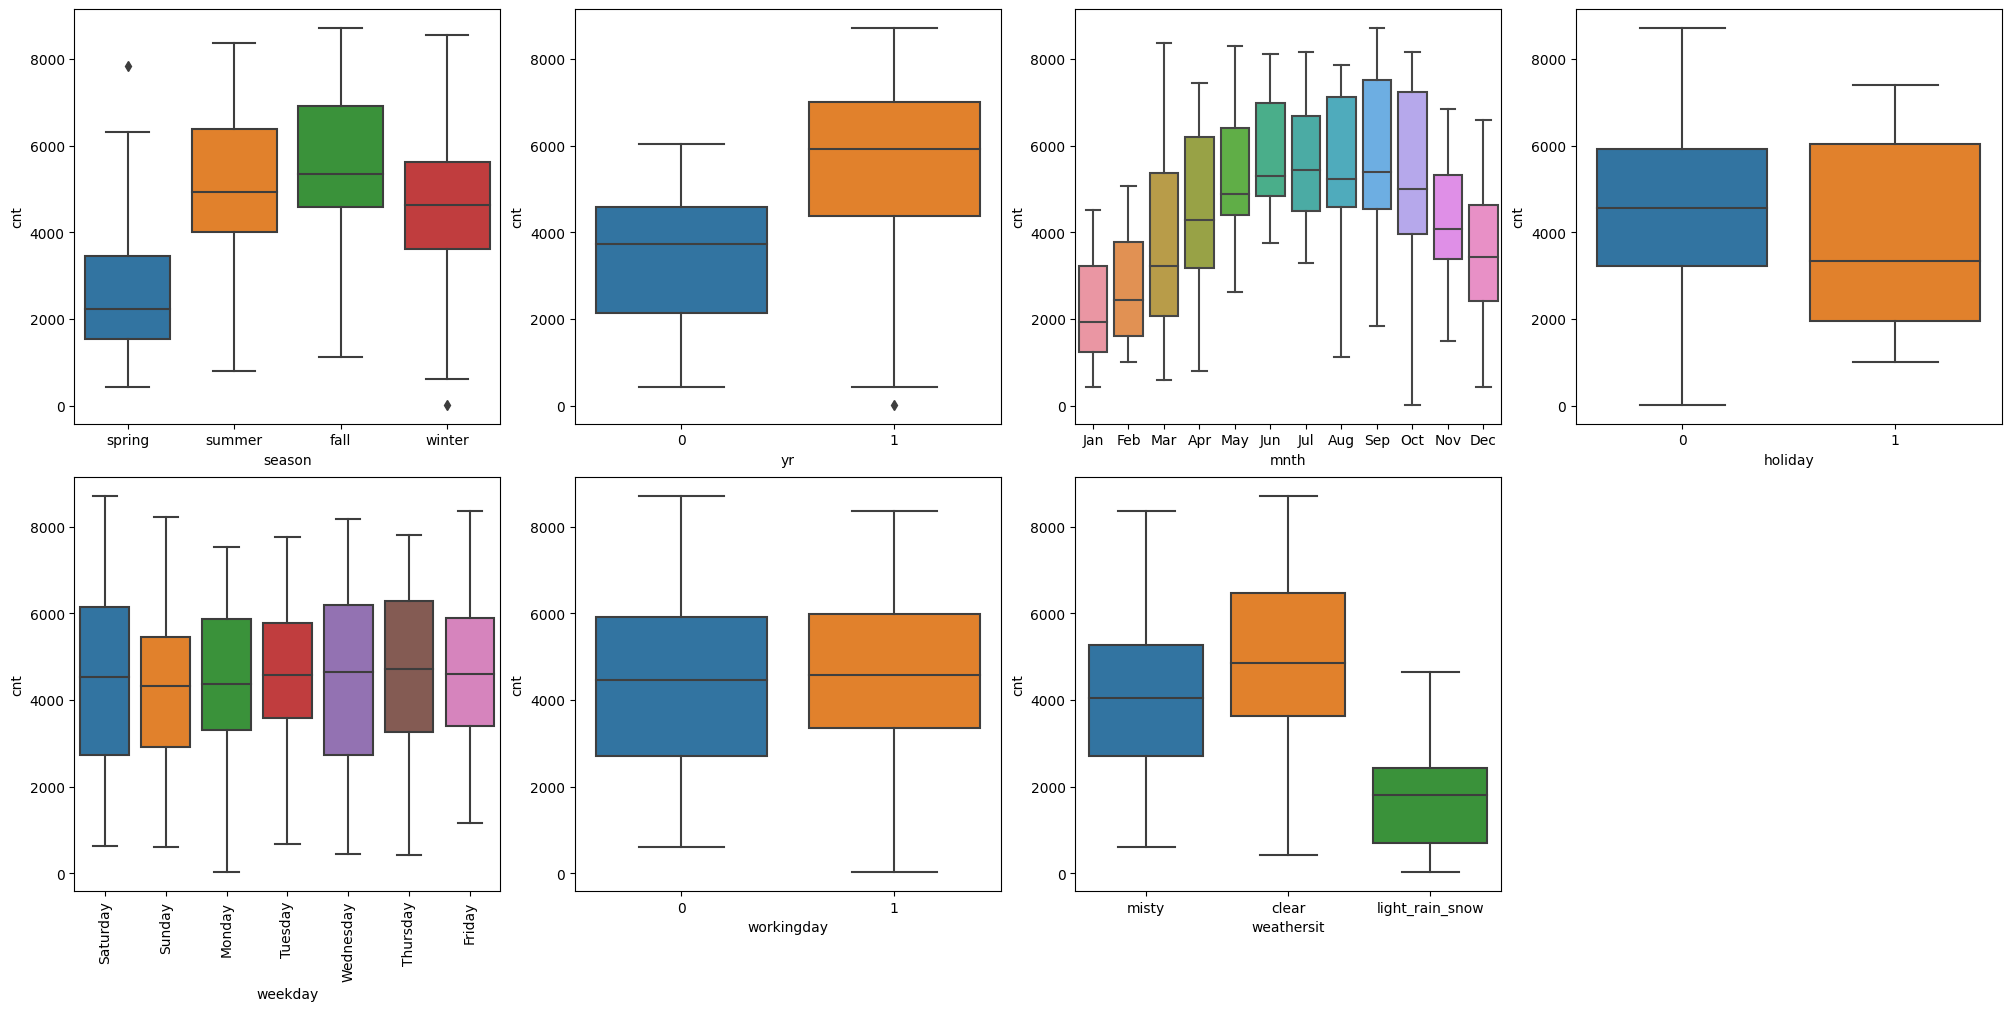

In [15]:
plt.figure(figsize=(20, 10), layout='constrained')
plot_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for idx, col in enumerate(plot_cols):
    if idx == plot_cols.index("weekday")+1:
        plt.xticks(rotation=90)
    else:
        plt.xticks(rotation=0)
    plt.subplot(2, 4, idx+1)
    sns.boxplot(x = col, y = 'cnt', data = bikes_df)

plt.show()

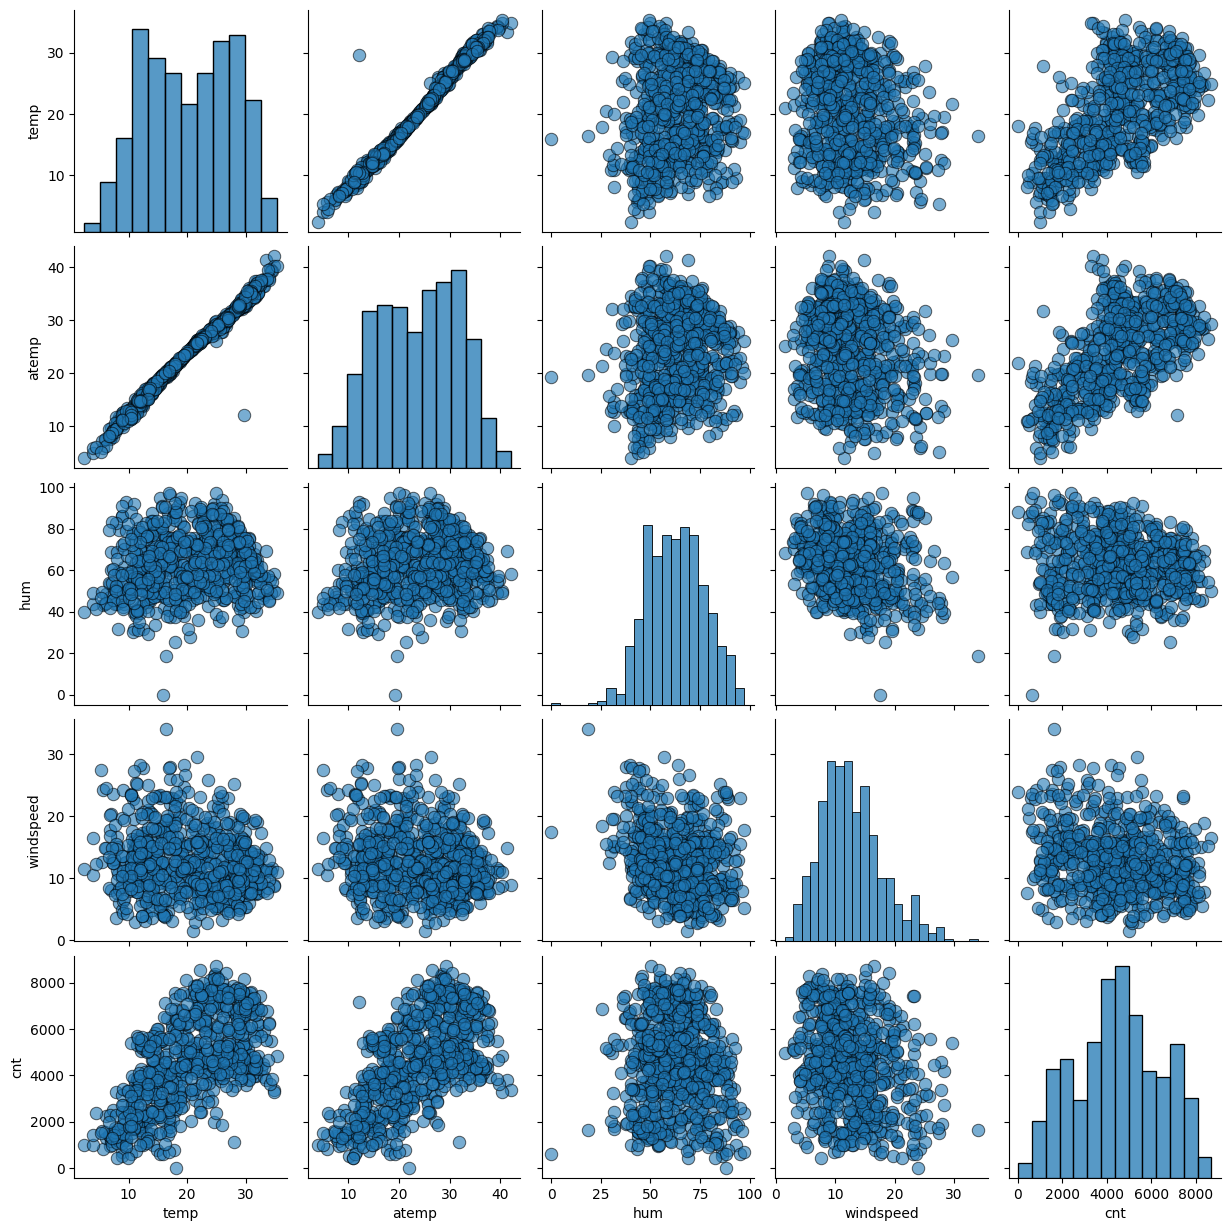

In [16]:
# Pairwise Scatter Plot
sns.pairplot(data=bikes_df, vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt'],
             plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'})
plt.show()

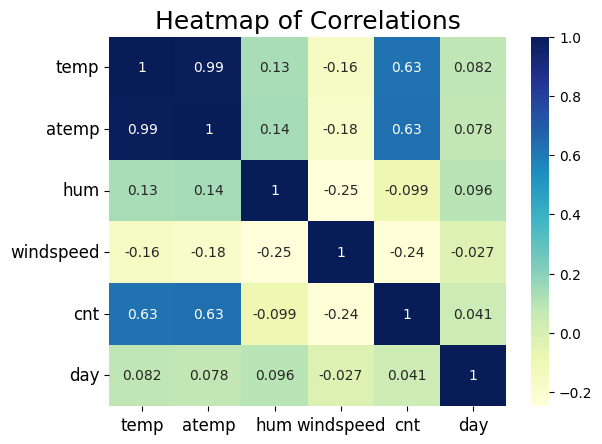

In [17]:
plt.title('Heatmap of Correlations',fontsize =18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.heatmap(bikes_df[['temp','atemp','hum','windspeed','cnt','day']].corr(), annot=True, cmap='YlGnBu')
plt.show()

In [18]:
# temp and atemp have a high correlation and hence we can drop one of them.
bikes_df.drop(columns='atemp', inplace=True, errors="ignore")

## Feature Engineering
**[Back to Top](#Table-of-Contents)**

The goal of feature engineering is to provide the linear regression model with more informative and relevant features, which can lead to better model accuracy and generalization.

### Encoding Categorical Variables
**[Back to Top](#Table-of-Contents)**

In [19]:
# Create dummy variables for categories, drop first category and drop original column as well.
bikes_categorical_df = pd.get_dummies(bikes_df, columns=['season', 'mnth', 'weekday', 'weathersit'], drop_first=True)

In [20]:
bikes_categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   hum                         730 non-null    float64
 5   windspeed                   730 non-null    float64
 6   cnt                         730 non-null    int64  
 7   day                         730 non-null    int64  
 8   season_spring               730 non-null    uint8  
 9   season_summer               730 non-null    uint8  
 10  season_winter               730 non-null    uint8  
 11  mnth_Aug                    730 non-null    uint8  
 12  mnth_Dec                    730 non-null    uint8  
 13  mnth_Feb                    730 non

### Splitting the Data into Training and Testing Sets
**[Back to Top](#Table-of-Contents)**

In [21]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
X, y = train_test_split(bikes_categorical_df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Scaling Numerical Features
**[Back to Top](#Table-of-Contents)**

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [23]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt', 'day']
X[num_vars] = scaler.fit_transform(X[num_vars])

In [24]:
X.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,day,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light_rain_snow,weathersit_misty
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0.500000,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,1.000000,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0.066667,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0.966667,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0.900000,0,1,...,0,0,0,1,0,0,0,0,0,1


In [25]:
X.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,day,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light_rain_snow,weathersit_misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.488366,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.294747,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.233333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.733333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model Building
**[Back to Top](#Table-of-Contents)**

In [26]:
y_train = X.pop('cnt')
X_train = X

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [28]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [29]:
lr.params

const                         0.246477
yr                            0.232133
holiday                       0.010379
workingday                    0.097340
temp                          0.450654
hum                          -0.150152
windspeed                    -0.186231
day                          -0.005310
season_spring                -0.049458
season_summer                 0.038693
season_winter                 0.104934
mnth_Aug                      0.014720
mnth_Dec                     -0.044155
mnth_Feb                     -0.031342
mnth_Jan                     -0.061674
mnth_Jul                     -0.040180
mnth_Jun                     -0.002722
mnth_Mar                      0.001782
mnth_May                      0.023743
mnth_Nov                     -0.040375
mnth_Oct                      0.009088
mnth_Sep                      0.081362
weekday_Monday               -0.020975
weekday_Saturday              0.096708
weekday_Sunday                0.042049
weekday_Thursday         

In [30]:
pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=["Column", "Included?", "Rank"]).sort_values("Rank")

,Column,Included?,Rank
0,yr,True,1
23,weekday_Sunday,True,1
22,weekday_Saturday,True,1
21,weekday_Monday,True,1
20,mnth_Sep,True,1
19,mnth_Oct,True,1
17,mnth_May,True,1
27,weathersit_light_rain_snow,True,1
13,mnth_Jan,True,1
10,mnth_Aug,True,1


In [31]:
not_selected_cols = X_train.columns[~rfe.support_]
print(f'The unselected columns after RFE are: {list(not_selected_cols)}')

The unselected columns after RFE are: ['day', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_Nov', 'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday']


In [32]:
col = X_train.columns[rfe.support_]
print(f'The selected {len(list(col))} columns after RFE are: {list(col)}')

The selected 20 columns after RFE are: ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Jan', 'mnth_Jul', 'mnth_May', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday', 'weathersit_light_rain_snow', 'weathersit_misty']


In [33]:
# Extract features selected by RFE
X_train_rfe = X_train[col]

### Feature Selection
**[Back to Top](#Table-of-Contents)**

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def fit_linear_model(df, labels):
    df_with_const = sm.add_constant(df)
    lm = sm.OLS(labels, df_with_const).fit()   # Running the linear model
    return lm 

def get_vif_for_features(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif    

In [35]:
# Fit the linear OLS model and get summary statistics
model = None

def create_and_show_model_statistics(features, labels, PRINT_RESULT=False):
    global model
    model = fit_linear_model(features, labels)
    if PRINT_RESULT:
        print(model.summary())
        print("\n" + "=" * 100 + "\n")
        print("Variance Inflation Factor of Features")
        print("-" * 50)
        print(get_vif_for_features(features))

create_and_show_model_statistics(features=X_train_rfe, labels=y_train, PRINT_RESULT=True)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Sat, 08 Jul 2023   Prob (F-statistic):          5.13e-189
Time:                        01:10:37   Log-Likelihood:                 525.02
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     490   BIC:                            -925.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

There are many columns with high pValue (>0.05) and high VIF (>5), hence we will remove each of them, one after the other.

In [36]:
# Removing all columns with p-value less than 0.05 (5%) iteratively
columns_dropped_wrt_p_value = []
while True:
    highest_pVal = pd.DataFrame(model.pvalues, columns=["pValue"]).sort_values("pValue").iloc[-1]
    if highest_pVal.values[0] > 0.05:
        col_name = highest_pVal.name
        print(f"\nRemove col: {col_name} with pval: {highest_pVal.values[0]}")
        X_train_rfe = X_train_rfe.drop([col_name], axis=1)
        columns_dropped_wrt_p_value.append(col_name)
        create_and_show_model_statistics(features=X_train_rfe, labels=y_train)
    else:
        break


Remove col: holiday with pval: 0.8550191072507628

Remove col: weekday_Monday with pval: 0.3131675291297492

Remove col: mnth_Aug with pval: 0.2392557009828115

Remove col: mnth_May with pval: 0.18941993675673308


In [37]:
# Removing all columns with vif greater than 5 iteratively
columns_dropped_wrt_vif = []
while True:
    vif = get_vif_for_features(X_train_rfe)
    highest_vif = vif.iloc[0]
    if highest_vif.values[1] > 5:
        col_name = highest_vif.values[0]
        print(f"\nRemoving column: {col_name} with VIF: {highest_vif.values[1]}")
        X_train_rfe = X_train_rfe.drop([col_name], axis=1)
        columns_dropped_wrt_vif.append(col_name)
        create_and_show_model_statistics(features=X_train_rfe, labels=y_train)
    else:
        break


Removing column: hum with VIF: 32.93

Removing column: workingday with VIF: 16.79

Removing column: temp with VIF: 5.31


In [38]:
print(f'Columns Dropped using p-Value: {columns_dropped_wrt_p_value}')

Columns Dropped using p-Value: ['holiday', 'weekday_Monday', 'mnth_Aug', 'mnth_May']


In [39]:
print(f'Columns Dropped using VIF: {columns_dropped_wrt_vif}')

Columns Dropped using VIF: ['hum', 'workingday', 'temp']


In [40]:
manually_dropped_columns = columns_dropped_wrt_p_value + columns_dropped_wrt_vif
print(f'All columns dropped manually: {manually_dropped_columns}')

All columns dropped manually: ['holiday', 'weekday_Monday', 'mnth_Aug', 'mnth_May', 'hum', 'workingday', 'temp']


## Model Evaluation
**[Back to Top](#Table-of-Contents)**

In [41]:
X_train_rfe = sm.add_constant(X_train_rfe)
y_train_preds = model.predict(X_train_rfe)

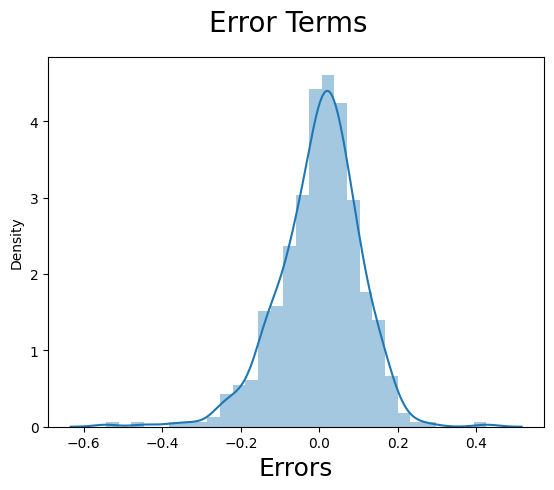

In [42]:
residuals = y_train - y_train_preds

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(residuals, bins = 30)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

### Making Predictions
**[Back to Top](#Table-of-Contents)**

In [43]:
y[num_vars] = scaler.transform(y[num_vars])

In [44]:
y_test = y.pop('cnt') # Remove target variable and put in y_test
X_test = y

In [45]:
X_test_new = sm.add_constant(X_test)
X_test_new = X_test_new[X_train_rfe.columns]

In [46]:
y_preds = model.predict(X_test_new)

Text(0, 0.5, 'y_pred')

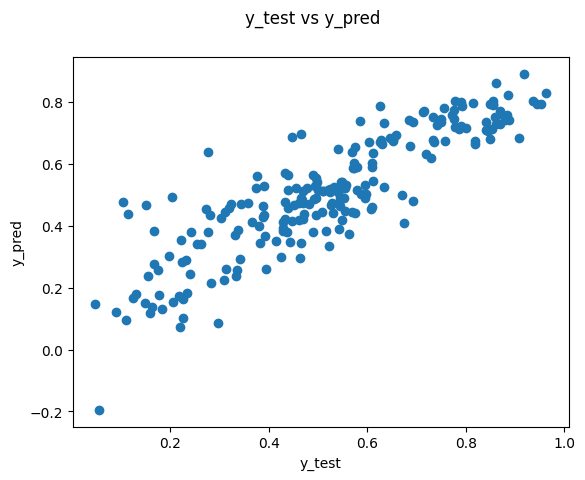

In [47]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_preds)
fig.suptitle('y_test vs y_pred')              # Plot heading 
plt.xlabel('y_test')                          # X-label
plt.ylabel('y_pred') 

## Result
**[Back to Top](#Table-of-Contents)**

In [48]:
# R2_Score on test set
from sklearn.metrics import r2_score
print(f'Coefficient of determination (R2 Score) for the test set: {r2_score(y_test, y_preds)*100:.2f} %')

Coefficient of determination (R2 Score) for the test set: 75.85 %


In [49]:
def replace_underscores(string):
  """Replaces all underscores with backslashes in the given string."""
  new_string = ""
  for character in string:
    if character == "_":
      new_string += "\\_"
    else:
      new_string += character
  return new_string

col_coef_mapping = [f'{round(coef, 2)}  \\times  {replace_underscores(column)}' for column, coef in zip(model.params.index, model.params.values)]

In [50]:
markdown_string = " + ".join(col_coef_mapping)

In [51]:
from IPython.display import Markdown as md

md("We can see that the equation of our best fitted line is:" + "\n\n" + "$Count = %s$"%(markdown_string))

We can see that the equation of our best fitted line is:

$Count = 0.59  \times  const + 0.25  \times  yr + -0.19  \times  windspeed + -0.26  \times  season\_spring + -0.04  \times  season\_summer + -0.11  \times  season\_winter + -0.1  \times  mnth\_Jan + -0.01  \times  mnth\_Jul + 0.1  \times  mnth\_Oct + 0.08  \times  mnth\_Sep + 0.01  \times  weekday\_Saturday + -0.05  \times  weekday\_Sunday + -0.32  \times  weathersit\_light\_rain\_snow + -0.09  \times  weathersit\_misty$